# Neste notebook estarei buscando responder:

Quantos contratos foram assinados por ano/mês? 

Qual o valor médio de contrato por ano?

Há alguma tendência (mais contratos em certos períodos)?

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
sns.set(style = 'whitegrid')

In [ ]:
ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = '';',
    decimal = ',',
    encoding = 'latin1'
)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

In [17]:
# Convertendo 'data_de_assinatura' novamente pois o arquivo CSV não preserva o tipo 'datetime' de forma direta

df['data_de_assinatura'] = pd.to_datetime(df['data_de_assinatura'])

In [18]:
df['ano_mes'] = df['data_de_assinatura'].dt.to_period('M')

In [21]:
contratos_por_ano_mes = df['ano_mes'].value_counts().sort_index()

In [ ]:
# Não me agradou, decidi fazer um por ano.
# plt.figure(figsize=(20, 6))
# contratos_por_ano_mes.plot(kind='bar', color='skyblue')
# plt.title("Número de Contratos Assinados por Ano/Mês", fontsize=16)
# plt.xlabel("Ano/Mês")
# plt.ylabel("Número de Contratos")
# plt.xticks(rotation=45)
# plt.show()

In [39]:
df['ano'] = df['data_de_assinatura'].dt.year
df['mes'] = df['data_de_assinatura'].dt.month

contratos_por_ano = df['ano'].value_counts().sort_index()
# print(contratos_por_ano)

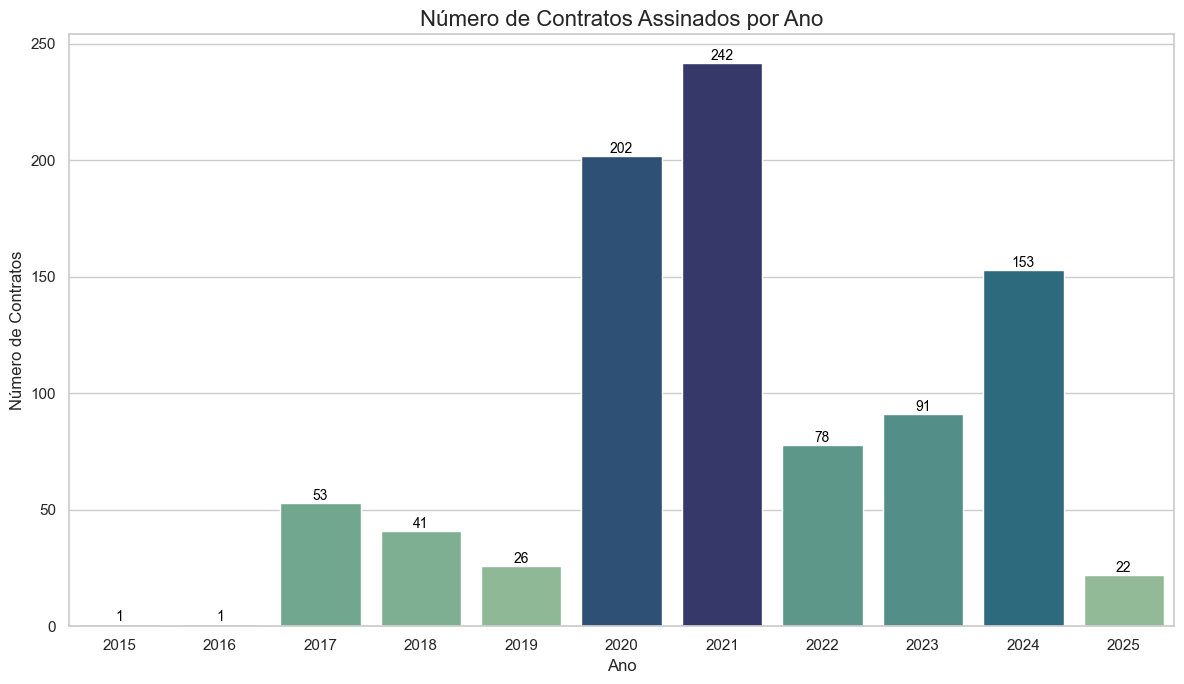

In [51]:
plt.figure(figsize=(12, 7))

grafico = sns.barplot(x = contratos_por_ano.index, y = contratos_por_ano.values, palette = 'crest', hue = contratos_por_ano, legend = False )

for p in grafico.patches:
    grafico.annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     fontsize = 10, color = 'black', 
                     xytext=(0, 5), textcoords = 'offset points')

plt.title('Número de Contratos Assinados por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Número de Contratos')
plt.tight_layout() 
plt.show()

In [ ]:
# Montando